In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
train_data = pd.read_csv('data/5/train.csv')
# X_train as the matrix of features except the column yield and id
X_train = train_data.iloc[:, 1:-1].values

# Y_train as the vector of the yield column
Y_train = train_data.iloc[:, -1].values

$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

In [113]:

def OLS(X, y):
    # Add intercept term (column of ones)
    X = np.c_[np.ones(X.shape[0]), X]
    # Calculate OLS estimates using normal equation
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

In [114]:
test_data = pd.read_csv('data/5/test.csv')
id_test = test_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values

def test(X_test = X_test):
    beta = OLS(X_train, Y_train)
    # Add intercept term to X_test to match X_train
    X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]
    Y_pred = X_test_with_intercept @ beta
    return Y_pred

Y_pred = test()
submission = pd.DataFrame({'id': id_test, 'y': Y_pred})
submission.to_csv('5_submission.csv', index=False)

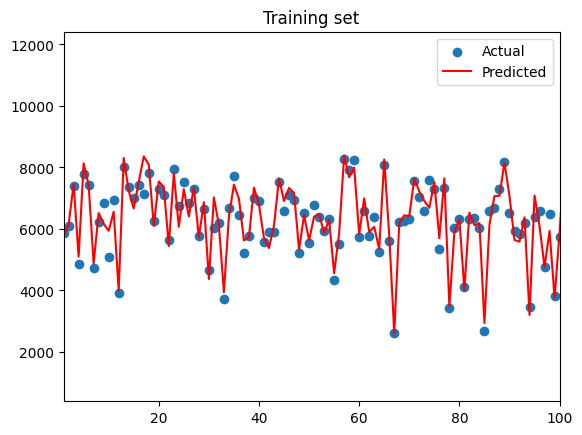

In [115]:
def plot_predictions(y_true, y_pred, title):
    X = np.arange(len(y_true))
    plt.xlim(1,100)
    plt.scatter(X, y_true, label='Actual')
    plt.plot(X, y_pred, color='red', label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    
plot_predictions(Y_train, test(X_train), 'Training set')

Mean Absolute Error on Training Set: 1087834.6295


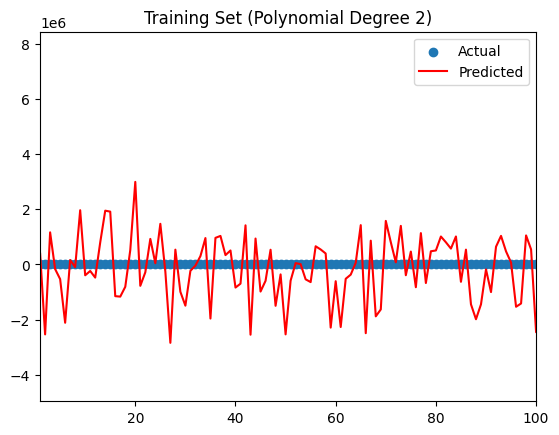

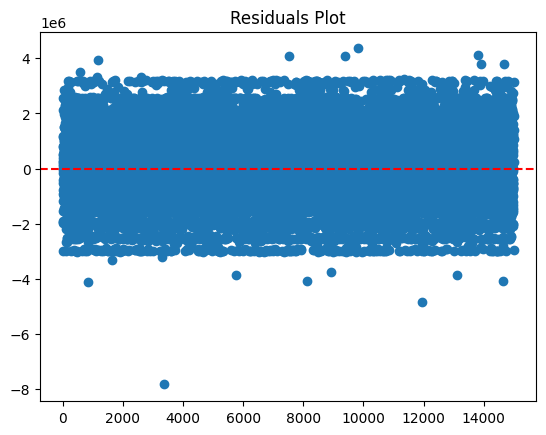

Predictions for Test Set:
[-1654723.51600183   967490.94781597   867336.94953687 ...
 -1649537.31355493   625827.5993582   -824243.4524849 ]


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data
train_data = pd.read_csv('data/5/train.csv')

# Extract the features (X_train) and the target variable (Y_train)
X_train = train_data.iloc[:, 1:-1].values
Y_train = train_data.iloc[:, -1].values

# Load the test data
test_data = pd.read_csv('data/5/test.csv')
id_test = test_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values

# Feature Extraction: Manual Polynomial Features
def add_polynomial_features(X, degree=2):
    # Start with the original features
    poly_features = X.copy()
    
    # Generate polynomial features
    for d in range(2, degree + 1):  # From 2nd degree to 'degree'
        poly_features = np.hstack((poly_features, X ** d))
    
    return poly_features

# OLS (Ordinary Least Squares) implementation
def OLS(X, y):
    # Add an intercept term (a column of ones)
    X = np.c_[np.ones(X.shape[0]), X]
    # Compute the OLS estimates using the normal equation
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

# Function to predict using the OLS model
def test(X_test, beta):
    # Add intercept term to X_test to match the form of X_train
    X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]
    # Make predictions
    Y_pred = X_test_with_intercept @ beta
    return Y_pred

# Plot the actual vs predicted values
def plot_predictions(y_true, y_pred, title):
    X = np.arange(len(y_true))  # Generate an array for plotting on X-axis
    plt.xlim(1, 100)  # Set the X-axis limits
    plt.scatter(X, y_true, label='Actual')  # Plot actual values
    plt.plot(X, y_pred, color='red', label='Predicted')  # Plot predicted values
    plt.title(title)
    plt.legend()
    plt.show()

# Residual Plot Function (for Residual Analysis)
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.scatter(np.arange(len(residuals)), residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals Plot')
    plt.show()

# If you want to evaluate the model, you can calculate the Mean Absolute Error (MAE) from scratch
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

### MAIN EXECUTION ###
# Add polynomial features (for feature extraction) without sklearn
degree = 2  # You can increase this to try higher-degree polynomials
X_train_poly = add_polynomial_features(X_train, degree=degree)
X_test_poly = add_polynomial_features(X_test, degree=degree)

# Fit the OLS model with the extended polynomial features
beta_poly = OLS(X_train_poly, Y_train)

# Predict on the training set
Y_train_pred = test(X_train_poly, beta_poly)

# Calculate and print the MAE for the training set
mae_train = MAE(Y_train, Y_train_pred)
print(f"Mean Absolute Error on Training Set: {mae_train:.4f}")

# Plot the actual vs predicted values for the training set
plot_predictions(Y_train, Y_train_pred, 'Training Set (Polynomial Degree 2)')

# Plot the residuals for the training set
plot_residuals(Y_train, Y_train_pred)

# Predict on the test set
Y_pred_test = test(X_test_poly, beta_poly)

# Save the predictions to a CSV file in the submission format
submission = pd.DataFrame({'id': id_test, 'y': Y_pred_test})
submission.to_csv('5_submission_polynomial.csv', index=False)

# Print the predictions for the test set
print("Predictions for Test Set:")
print(Y_pred_test)


Mean Absolute Error (OLS): 269.5974
Mean Absolute Error (Kernel Regression): 324.0013


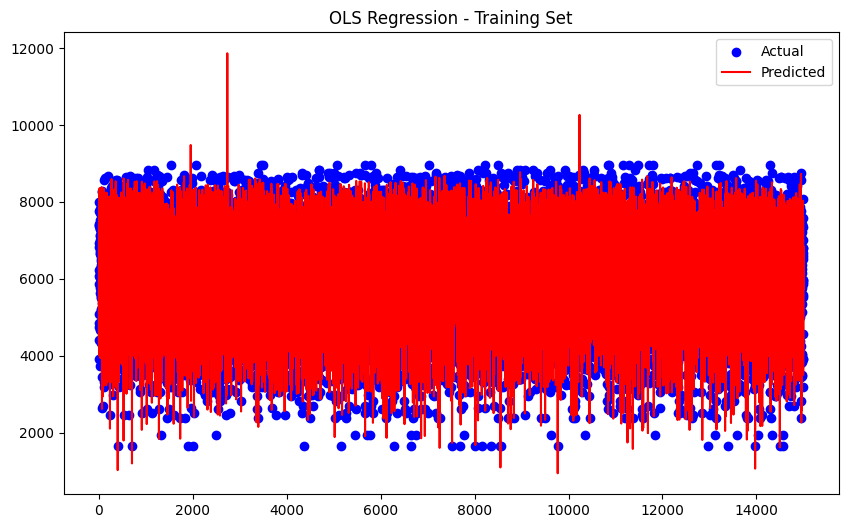

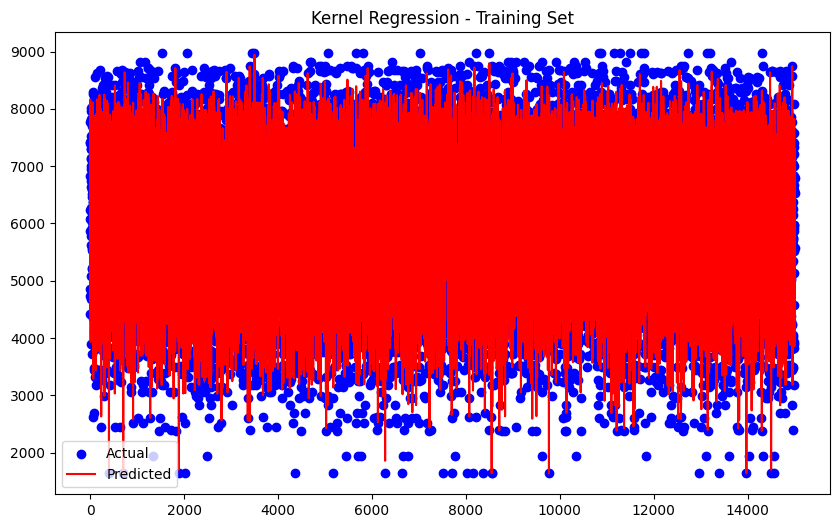

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('data/5/train.csv')
test_data = pd.read_csv('data/5/test.csv')

# Extract features and labels from the training set
X_train = train_data.iloc[:, 1:-1].values
Y_train = train_data.iloc[:, -1].values

# Extract features from the test set
X_test = test_data.iloc[:, 1:].values
id_test = test_data.iloc[:, 0].values

# OLS (Ordinary Least Squares) Regression from scratch
def OLS(X, y):
    # Add intercept term (column of ones)
    X = np.c_[np.ones(X.shape[0]), X]
    # OLS estimate using the normal equation
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

# Efficient kernel regression (without full matrix storage)
def kernel_regression_efficient(X_train, Y_train, X_test, gamma=0.1):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    Y_pred = np.zeros(n_test)
    
    # Iterate over test data points
    for i in range(n_test):
        x_test = X_test[i, :]
        
        # Calculate the RBF kernel (without storing the full matrix)
        K = np.exp(-gamma * np.sum((X_train - x_test) ** 2, axis=1))
        
        # Perform weighted sum of training outputs using the kernel
        Y_pred[i] = np.dot(K, Y_train) / np.sum(K)
    
    return Y_pred

# Mean Absolute Error (MAE) from scratch
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Test the OLS model
def test_OLS(X_train, Y_train, X_test):
    beta = OLS(X_train, Y_train)
    # Add intercept to test data
    X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]
    Y_pred = X_test_with_intercept @ beta
    return Y_pred

# Test the efficient Kernel Regression model
def test_kernel_regression_efficient(X_train, Y_train, X_test, gamma=0.1):
    return kernel_regression_efficient(X_train, Y_train, X_test, gamma)

# Plot predictions for visualization
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    X = np.arange(len(y_true))
    plt.scatter(X, y_true, label='Actual', color='blue')
    plt.plot(X, y_pred, color='red', label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

# Train and evaluate models
Y_pred_OLS = test_OLS(X_train, Y_train, X_train)
Y_pred_kernel = test_kernel_regression_efficient(X_train, Y_train, X_train, gamma=0.1)

# Calculate MAE for OLS
mae_ols = mean_absolute_error(Y_train, Y_pred_OLS)
print(f"Mean Absolute Error (OLS): {mae_ols:.4f}")

# Calculate MAE for Kernel Regression
mae_kernel = mean_absolute_error(Y_train, Y_pred_kernel)
print(f"Mean Absolute Error (Kernel Regression): {mae_kernel:.4f}")

# Final prediction for test set
Y_pred_test_OLS = test_OLS(X_train, Y_train, X_test)
Y_pred_test_kernel = test_kernel_regression_efficient(X_train, Y_train, X_test, gamma=0.1)

# Save predictions for OLS
submission_ols = pd.DataFrame({'id': id_test, 'y': Y_pred_test_OLS})
submission_ols.to_csv('OLS_submission.csv', index=False)

# Save predictions for Kernel Regression
submission_kernel = pd.DataFrame({'id': id_test, 'y': Y_pred_test_kernel})
submission_kernel.to_csv('Kernel_submission.csv', index=False)

# Plot OLS predictions vs actuals
plot_predictions(Y_train, Y_pred_OLS, 'OLS Regression - Training Set')

# Plot Kernel Regression predictions vs actuals
plot_predictions(Y_train, Y_pred_kernel, 'Kernel Regression - Training Set')
